# Homework 3
### Name: Yanfei Qin
### PennKey: yfqin
### PennID: 51386260

# Preamble


This homework deals entirely with presentation of a single variable: the monthly extent of ice coverage in the Arctic ocean, a widely-used and highly visible impact of climate change over time. The dataset begins in 1978 and extends to March 2018.

In [1]:
from google.colab import files
files.upload()

Saving Arctic Sea Ice Extent.csv to Arctic Sea Ice Extent.csv


{'Arctic Sea Ice Extent.csv': b'Date,Extent,,,\r\n10/26/78,10.231,,,\r\n10/28/78,10.42,,,\r\n10/30/78,10.557,,,\r\n11/1/78,10.67,,,\r\n11/3/78,10.777,,,\r\n11/5/78,10.968,,,\r\n11/7/78,11.08,,,\r\n11/9/78,11.189,,,\r\n11/11/78,11.314,,,\r\n11/13/78,11.46,,,\r\n11/15/78,11.539,,,\r\n11/17/78,11.696,,,\r\n11/19/78,11.87,,,\r\n11/21/78,12.053,,,\r\n11/23/78,12.274,,,\r\n11/25/78,12.441,,,\r\n11/27/78,12.662,,,\r\n11/29/78,12.684,,,\r\n12/1/78,12.725,,,\r\n12/3/78,12.66,,,\r\n12/5/78,12.785,,,\r\n12/7/78,13.051,,,\r\n12/9/78,13.143,,,\r\n12/11/78,13.437,,,\r\n12/13/78,13.603,,,\r\n12/15/78,13.649,,,\r\n12/17/78,13.807,,,\r\n12/19/78,13.892,,,\r\n12/21/78,13.996,,,\r\n12/23/78,14.189,,,\r\n12/25/78,14.268,,,\r\n12/27/78,14.383,,,\r\n12/29/78,14.5,,,\r\n12/31/78,14.585,,,\r\n1/2/79,14.997,,,\r\n1/4/79,14.922,,,\r\n1/6/79,14.929,,,\r\n1/8/79,14.968,,,\r\n1/10/79,15.19,,,\r\n1/12/79,15.327,,,\r\n1/14/79,15.352,,,\r\n1/16/79,15.5,,,\r\n1/18/79,15.517,,,\r\n1/20/79,15.709,,,\r\n1/22/79,15.679,,,

In [2]:
import pandas as pd
arctic_ice = pd.read_csv('Arctic Sea Ice Extent.csv', index_col='Date', parse_dates=True)
arctic_ice

,Extent,Unnamed: 2,Unnamed: 3,Unnamed: 4
Date,,,,
1978-10-26,10.231,NaN,NaN,NaN
1978-10-28,10.420,NaN,NaN,NaN
1978-10-30,10.557,NaN,NaN,NaN
1978-11-01,10.670,NaN,NaN,NaN
1978-11-03,10.777,NaN,NaN,NaN
...,...,...,...,...
2018-03-27,14.256,NaN,NaN,NaN
2018-03-28,14.302,NaN,NaN,NaN
2018-03-29,14.238,NaN,NaN,NaN


In [3]:
arctic_ice = arctic_ice.loc[:, ~arctic_ice.columns.str.contains('Unnamed')]
arctic_ice

,Extent
Date,
1978-10-26,10.231
1978-10-28,10.420
1978-10-30,10.557
1978-11-01,10.670
1978-11-03,10.777
...,...
2018-03-27,14.256
2018-03-28,14.302
2018-03-29,14.238


# Warm-Up Tasks (15 points)


## Figure 1: Overall Trendline (5 points)
Generate a line chart with an X axis that extends over the full time period from 1978 to 2018. Plot the full sea ice extent dataset in a single figure, with appropriate labels, axes, and color schemes (sometimes, defaults are fine - you don't need to custom modify every setting).

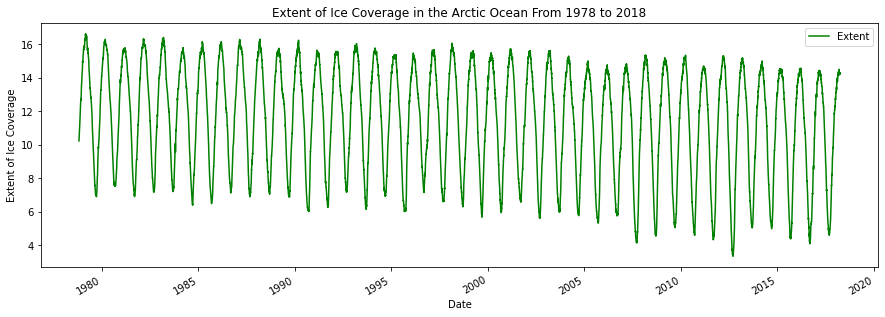

In [4]:
arctic_ice.plot(
    kind='line', 
    y='Extent', 
    figsize=(15, 5), 
    style='-g', 
    xlabel = 'Date', 
    ylabel = 'Extent of Ice Coverage', 
    legend= True, 
    title='Extent of Ice Coverage in the Arctic Ocean From 1978 to 2018')

## Dataframe Generation: Monthly Averages (5 points)

Generate a new dataframe `monthly_df` with one row per month, from October 1978 to March 2018. Each row should contain the following five columns:
   * Month
   * Year
   * Minimum Extent
   * Mean Extent
   * Maximum Extent


In [5]:
monthly_df = arctic_ice.resample('1M').ohlc()['Extent']
monthly_df = monthly_df.drop(columns=['open', 'close'])
monthly_df = monthly_df.rename(columns={"high": "Maximum Extent", "low": "Minimum Extent"})
monthly_df['Mean Extent'] = pd.Series(arctic_ice.resample('1M')['Extent'].mean()).values
monthly_df = monthly_df.reset_index()
monthly_df['Month'] = monthly_df['Date'].dt.month
monthly_df['Year'] = monthly_df['Date'].dt.year
monthly_df = monthly_df.drop(columns=['Date'])
monthly_df = monthly_df[['Month','Year','Minimum Extent','Mean Extent','Maximum Extent']]
monthly_df

,Month,Year,Minimum Extent,Mean Extent,Maximum Extent
0,10,1978,10.231,10.402667,10.557
1,11,1978,10.670,11.645133,12.684
2,12,1978,12.660,13.667063,14.585
3,1,1979,14.922,15.414000,15.912
4,2,1979,15.801,16.175286,16.579
...,...,...,...,...,...
469,11,2017,8.193,9.457767,10.582
470,12,2017,10.785,11.752387,12.418
471,1,2018,12.491,13.056645,13.594
472,2,2018,13.741,13.945893,14.286


## Deviation from Baseline (5 points)

For each month (January through December), calculate the mean extent of arctic sea ice in that month for the first 10 years of our data (1978-1987). Store these values in a dictionary or dataframe named `monthly_baselines`.

Then, create a new column `deviation_from_baseline` in `monthly_df` with the following values:
   * `None` or `NaN` for each row from October 1978 to December 1987.
   * The difference between the monthly mean and the monthly baseline, for each row from January 1988 to March 2018.


In [6]:
monthly_baselines = pd.DataFrame(monthly_df.query('Year <= 1987').groupby('Month')['Mean Extent'].mean())
monthly_baselines = monthly_baselines.rename(columns={'Mean Extent':'Mean Extent Baselines'})
monthly_baselines

,Mean Extent Baselines
Month,
1,14.929144
2,15.812643
3,15.926607
4,15.240504
5,13.743132
6,12.307600
7,10.202307
8,7.871939
9,7.193915


In [7]:
monthly_df = monthly_df.merge(monthly_baselines, how='left', left_on='Month', right_on=monthly_baselines.index)
monthly_df.head()

,Month,Year,Minimum Extent,Mean Extent,Maximum Extent,Mean Extent Baselines
0,10,1978,10.231,10.402667,10.557,9.158400
1,11,1978,10.670,11.645133,12.684,11.253190
2,12,1978,12.660,13.667063,14.585,13.267993
3,1,1979,14.922,15.414000,15.912,14.929144
4,2,1979,15.801,16.175286,16.579,15.812643


In [8]:
monthly_df['deviation_from_baseline'] = monthly_df['Mean Extent'] - monthly_df['Mean Extent Baselines']
monthly_df.head()

,Month,Year,Minimum Extent,Mean Extent,Maximum Extent,Mean Extent Baselines,deviation_from_baseline
0,10,1978,10.231,10.402667,10.557,9.158400,1.244267
1,11,1978,10.670,11.645133,12.684,11.253190,0.391943
2,12,1978,12.660,13.667063,14.585,13.267993,0.399069
3,1,1979,14.922,15.414000,15.912,14.929144,0.484856
4,2,1979,15.801,16.175286,16.579,15.812643,0.362642


In [9]:
BeforeDec1987 = monthly_df.loc[monthly_df['Year']<=1987]

In [10]:
import numpy as np
BeforeDec1987['deviation_from_baseline']=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
monthly_df = pd.concat([BeforeDec1987,monthly_df.query('Year > 1987')],axis=0)
monthly_df = monthly_df.drop(columns=['Mean Extent Baselines'])
monthly_df

,Month,Year,Minimum Extent,Mean Extent,Maximum Extent,deviation_from_baseline
0,10,1978,10.231,10.402667,10.557,NaN
1,11,1978,10.670,11.645133,12.684,NaN
2,12,1978,12.660,13.667063,14.585,NaN
3,1,1979,14.922,15.414000,15.912,NaN
4,2,1979,15.801,16.175286,16.579,NaN
...,...,...,...,...,...,...
469,11,2017,8.193,9.457767,10.582,-1.795423
470,12,2017,10.785,11.752387,12.418,-1.515606
471,1,2018,12.491,13.056645,13.594,-1.872498
472,2,2018,13.741,13.945893,14.286,-1.866751


# Part 2: Creative Visualization (30 points)

Choose two of the following three figure generation tasks. You may leave the third task blank or delete it from your submitted notebook.

For 10 points per task, use a combination of color, alpha, size, orientation, and shape parameters to make each figure readable and intuitive and to clearly visualize the change in sea ice extent over time. Consider the sample images from the Canvas assignment as inspiration for your approach.

Then, for 5 points per task, thoroughly describe in writing each visualization choice that you made for the final figure above. What combination of visual settings were most appropriate for this data, and what alternatives did you have? To assist your explanation, you might include code and a generated image for at least one alternative choice that you could have made, then explain why your chosen figure is a better option for presenting this data. 

## Figure Task 1: Year-Over-Year Percent Trends

On a single figure, graph a scatter plot. Each **month** in the sea ice dataset should be represented as a single point in the scatter plot. The Y axis for this scatter plot should represent **year-over-year percent change**. For instance, if the monthly average for February of one year is 16 and the next year is 15.5, the year-over-year percent change would be -3.125%. 

Choose an appropriate X axis to visualize this data clearly; explain this axis in your written description of the choices you made when designing this figure.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

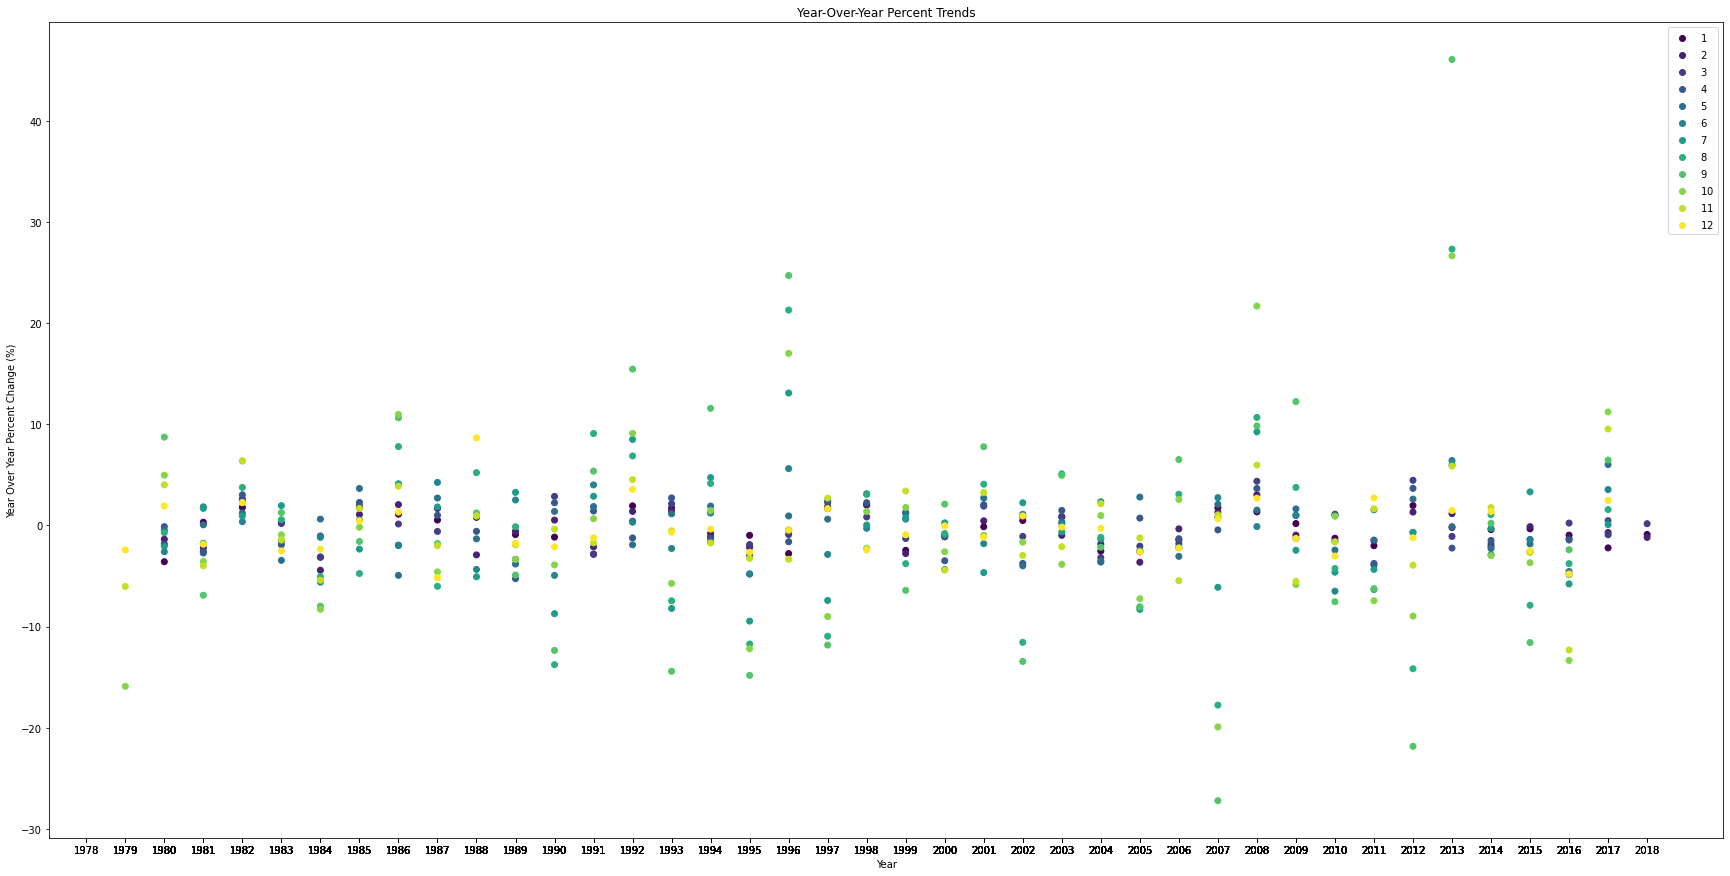

In [13]:
plt.figure(figsize=(30,15))
scatter = plt.scatter(monthly_df['Year'],((monthly_df['Mean Extent'].diff(12)/(monthly_df['Mean Extent']-monthly_df['Mean Extent'].diff(12)))*100),c=monthly_df['Month'])
plt.xticks(monthly_df['Year'])
plt.xlabel("Year")
plt.ylabel("Year Over Year Percent Change (%)")
plt.title("Year-Over-Year Percent Trends")
plt.legend(*scatter.legend_elements(),loc='upper right')
plt.savefig("Year-Over-Year Percent Trends.png")

### Figure Task 1 Answer Part 1
As shown above, each month in the sea ice dataset is represented as a single point in the scatter plot. The Y axis of the scatter plot represents year-over-year percent change in the unit of %. The X axis I choose to visualize this data clearly is 'Year'. The reason why I choose this x axis is that it clearly plots the percent change of every month of a single year in the yearly timeline (so we are able to see all the changes for a specific year vertically aligned). As we can see, most of the year-over-year percent change cluster within the range of +10% ~ -10%, however in the recent years there are more extreme values out of the range, like in Oct 2007 there is a nearly -30& precent change. I think it validates the fact that the extent of ice coverage in the Arctic Ocean is affected by global warming and shows some abnormal phenomenon.



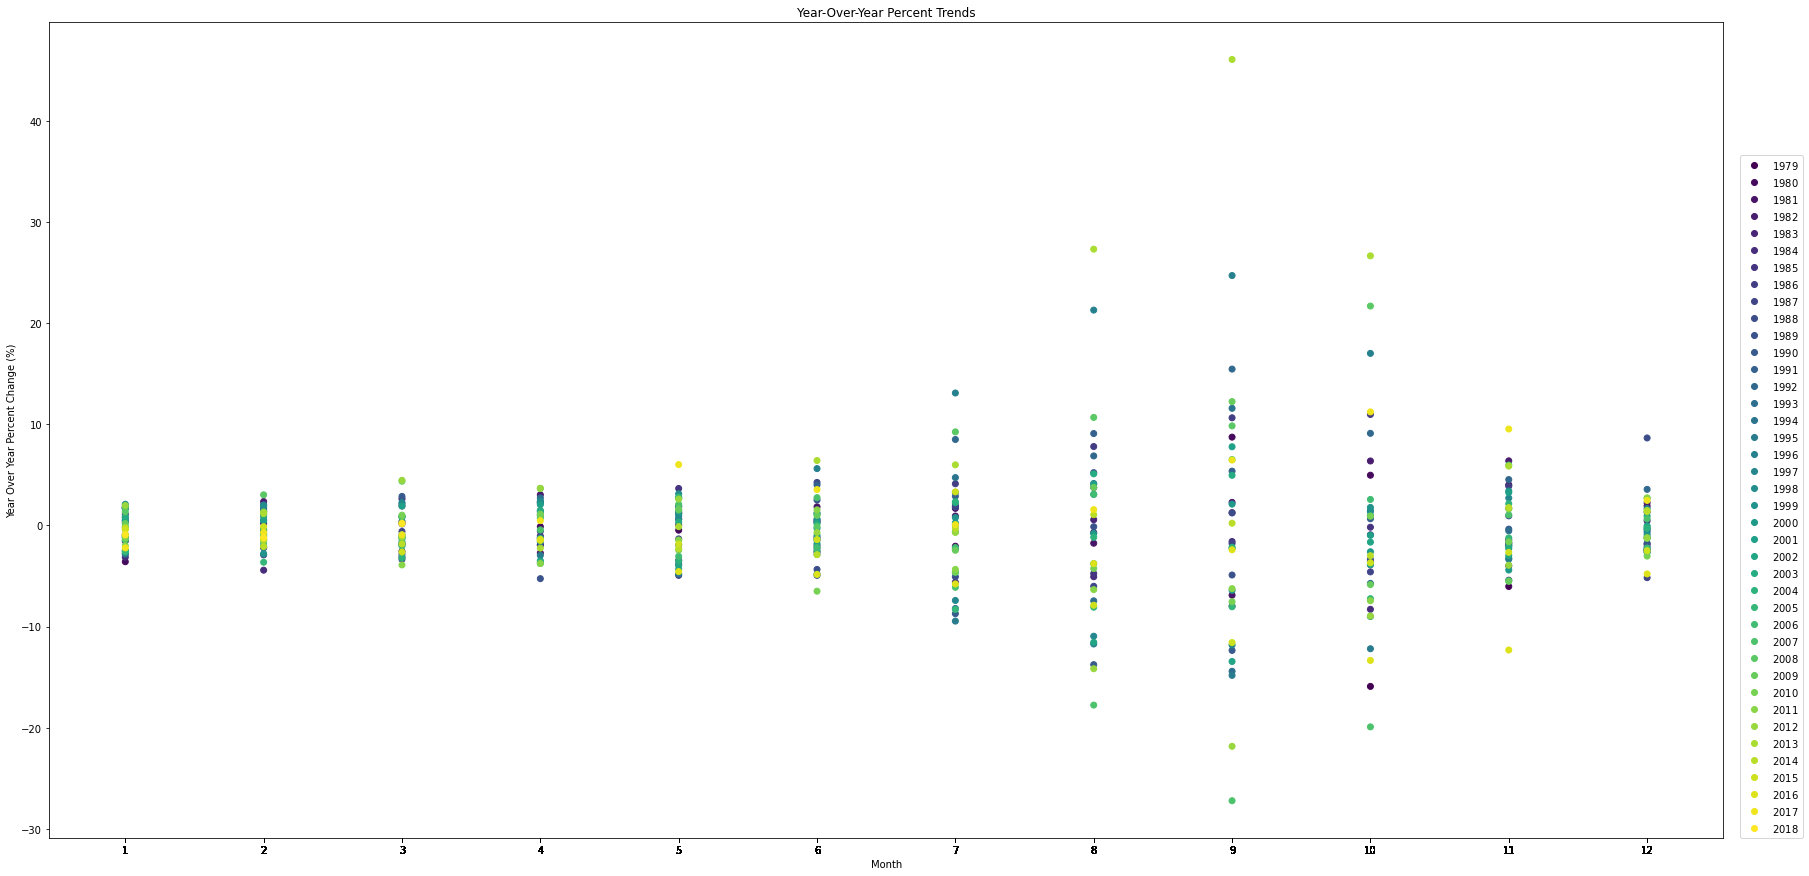

In [14]:
plt.figure(figsize=(30,15))
scatter2 = plt.scatter(monthly_df['Month'],((monthly_df['Mean Extent'].diff(12)/(monthly_df['Mean Extent']-monthly_df['Mean Extent'].diff(12)))*100),c=monthly_df['Year'])
plt.xticks(monthly_df['Month'])
plt.xlabel("Month")
plt.ylabel("Year Over Year Percent Change (%)")
plt.title("Year-Over-Year Percent Trends")
plt.legend(*scatter2.legend_elements(num=41),loc=(1.01, 0))
plt.savefig("Year-Over-Year Percent Trends Alternative.png")

### Figure Task 1 Answer Part 2
The scatterplot above uses the alternative x-axis of "Month". It is a good visualization showing the trend of Year-over-Year percent change based on different months. As we can see, the percent changes are more active between the Summer and Fall seasons, comparing to other months. However, this graph with x-axis of "Month" cannot clearly show the trend of percent changes across the timeline of years (since all years are clustered), which is really essential in order to estimate the overall trend of year-over-year percent change.

## Figure Task 2: Annual Trends over Time

On a single figure, graph separate line plots for each year from 1978 to 2018. The X axis should be marked with 12 ticks from "January" to "December". Each year's line should span the full width of the figure. The specific data points included your figure may be either individual daily data points or monthly averages (or something else, if you have another idea).

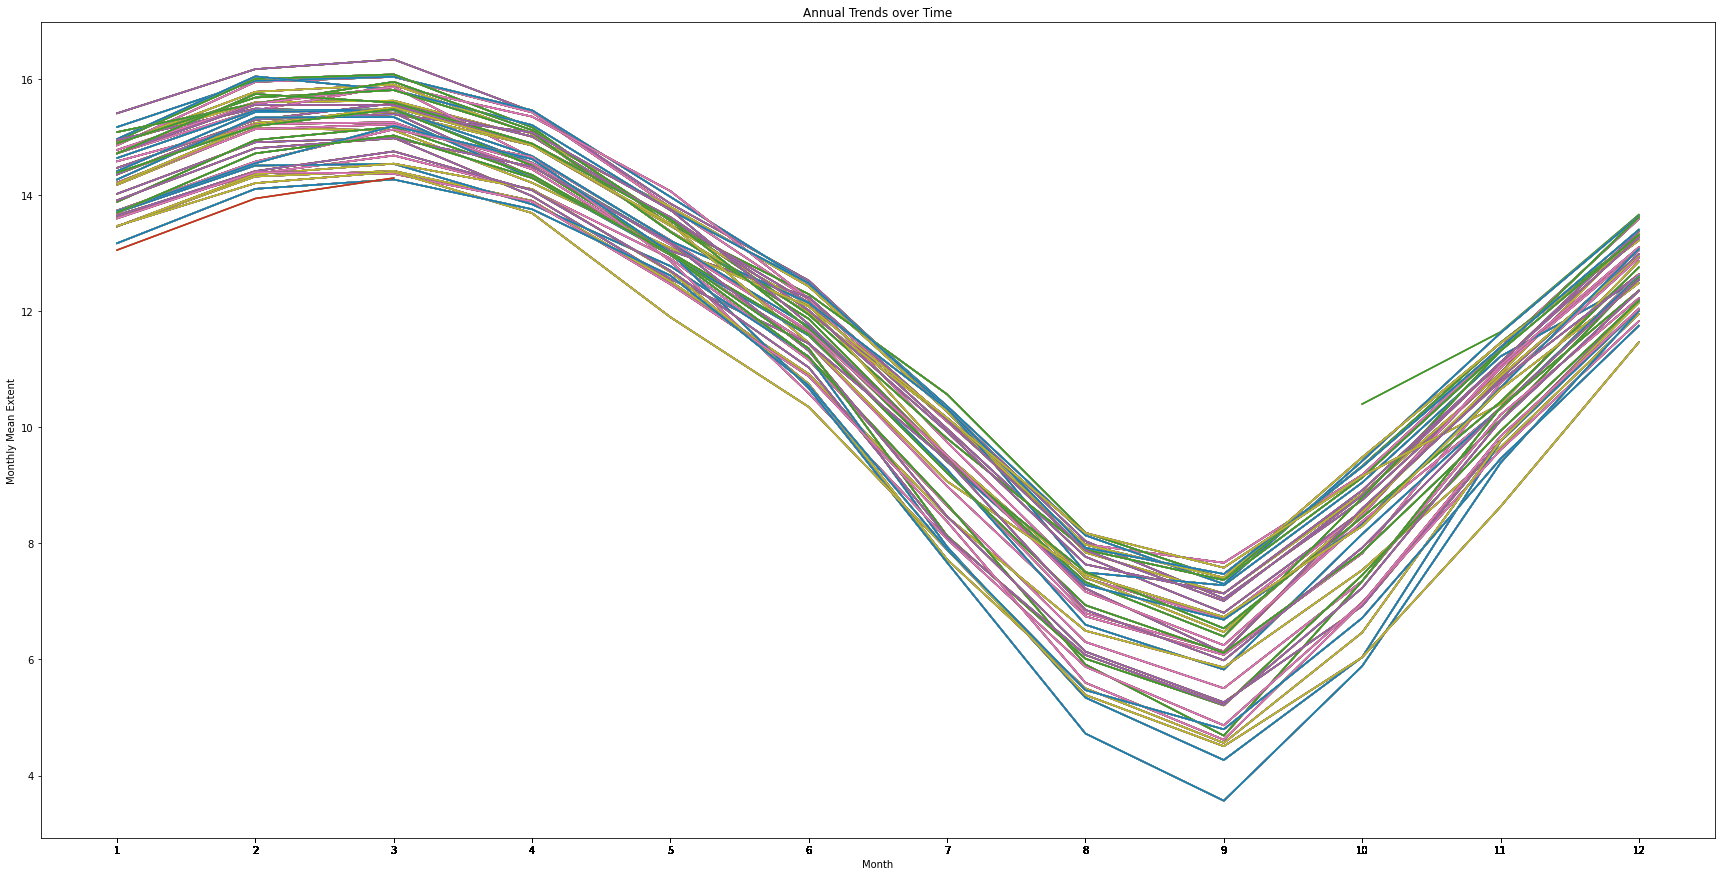

In [30]:
plt.figure(figsize=(30,15))
for i in monthly_df['Year']:
  plt.plot(monthly_df.loc[monthly_df['Year']== i ].Month, monthly_df.loc[monthly_df['Year']== i ]["Mean Extent"])
plt.xticks(monthly_df['Month'])
plt.xlabel("Month")
plt.ylabel("Monthly Mean Extent")
plt.title("Annual Trends over Time")
plt.savefig("Annual Trend Line Plot.png")

### Figure Task 2 Answer Part 1
The above single figure graphs separate line plots for the monthly average of ice coverage extent each year from 1978 to 2018. The X axis is marked with 12 ticks, each representing a month. Each year's line spans the full width of the figure. The specific data points included the figure is the monthly averages of ice coverage extent, which I think is the most fitted data values in this case.


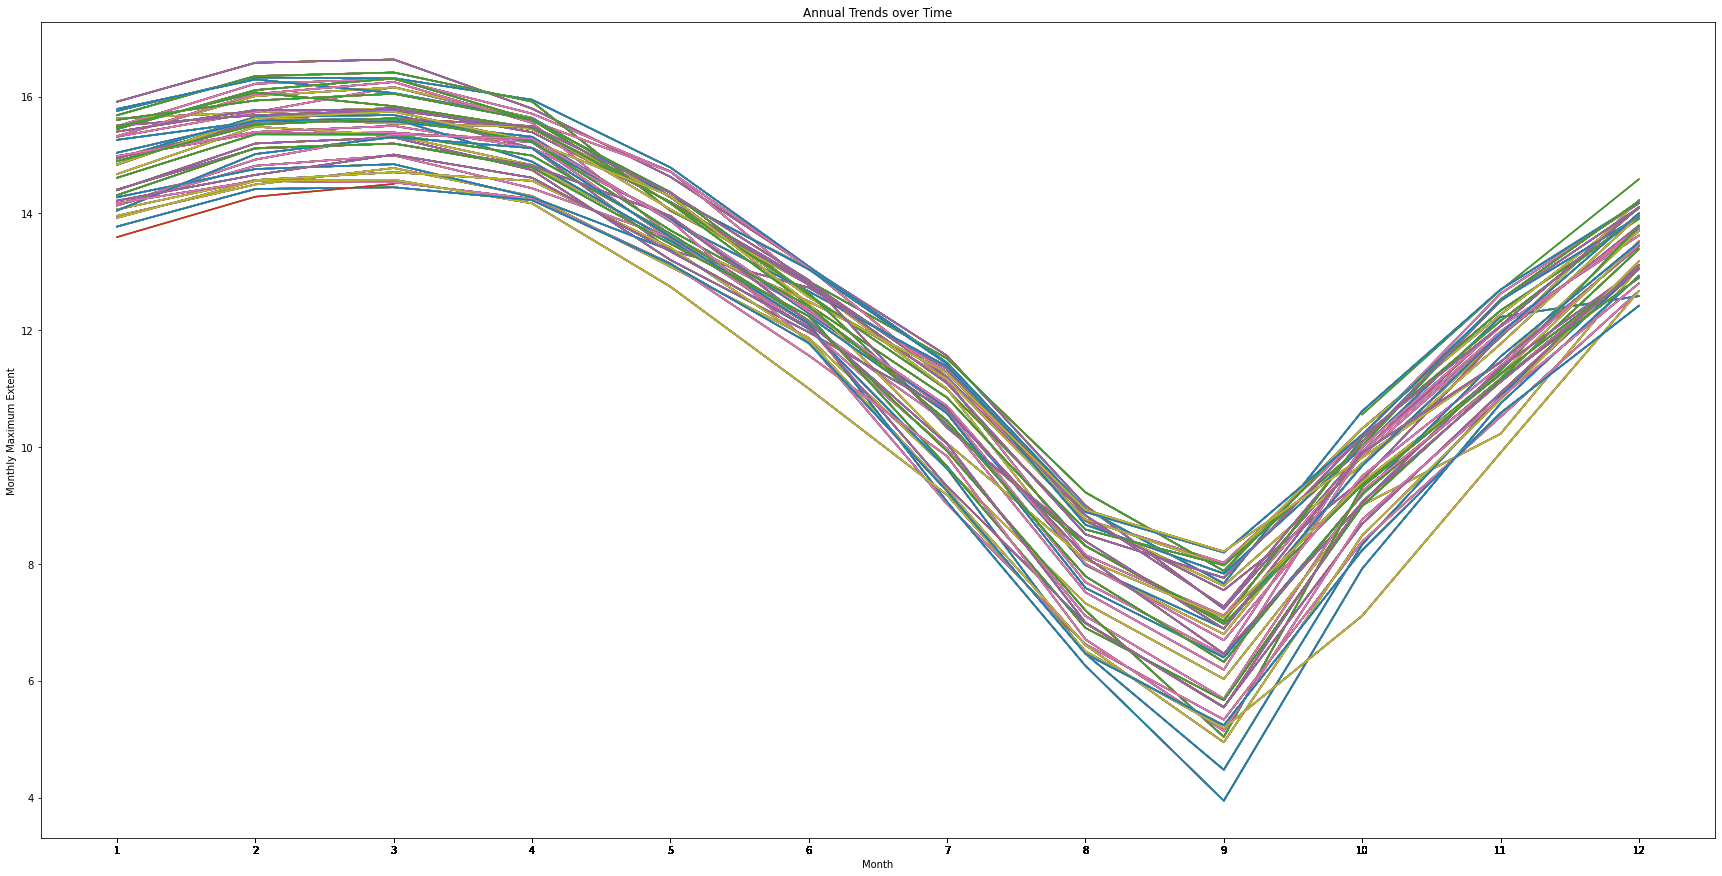

In [39]:
plt.figure(figsize=(30,15))
for i in monthly_df['Year']:
  plt.plot(monthly_df.loc[monthly_df['Year']== i ].Month, monthly_df.loc[monthly_df['Year']== i ]["Maximum Extent"])
  plt.xticks(monthly_df['Month'])
  plt.xlabel("Month")
  plt.ylabel("Monthly Maximum Extent")
  plt.title("Annual Trends over Time")
plt.savefig("Annual Trend Alternative.png")

### Figure Task 2 Answer Part 2
The above single figure graphs separate line plots for the monthly maximum of ice coverage extent each year from 1978 to 2018. It is an alternative figure I would not recommend because maximum values' overall annual trend is not that informative since a monthly maximum extent value only represent a single day of that month for a specific year. On contrast, the mean extent (which I choose to plot in the previous figure) is more representative for the all extent values of a specific year's specific month.

# Figure Task 3: Pie Charts

Generate a new column `day_change` for your original dataset, following these rules:

   * For each day in your dataset, calculate the day closest to one year earlier in the dataset. There may not always be an exact match; when that data is missing, either treat this as missing data or choose the next-closest day. 
   * Assign a value of `INCREASE`, `EQUAL`, or `DECREASE` to each row, identifying whether sea ice extent is greater or smaller than the next-closest day in the previous year.

Then, for each year from 1979 to 2018, generate a pie chart showing the distribution of `INCREASE`, `EQUAL`, or `DECREASE` labels in the `day_change` column for that year. Include all these pie charts as subplots in a single generated figure.

# Part 3: Discussion (5 points)

Regardless of whether you have worked in data visualization in the past or not, this is likely your first time working with Matplotlib specifically. Now that you have some experience with the library:
   * What specific tasks or settings are harder to modify than you expected? 
   * On the other hand, which tasks are easier than you expected? 
   * What additional ways of displaying data you would want to see, but don't yet know how to do in Python?

1. What specific tasks or settings are harder to modify than you expected?

It is really hard to plot each month's dot into different colors with legend on the side for Task 1. The reason why coloring is hard is because we did not go through this in the lecture. The reason why putting legend is hard is that there are repetitive month values for every year, and legend only would need 12 months. So instead of simply writing plt.legend(monthly_df['Month']) (which would give me a legend filled with repetitive months like multiple October, etc.), I need to find another way of constructing the legend. It costs me a lot of time and energy.

2. On the other hand, which tasks are easier than you expected?

It is easier than I expected to plot separate line plots for the monthly average of ice coverage extent each year from 1978 to 2018. I initially thought it is rather hard since all years are not separatedly listed in the monthly_df dataset, so plotting multiple lines would be tough. However, I find out a simple for loop function can finish all the line plottings, which is pretty amazing.
3. What additional ways of displaying data you would want to see, but don't yet know how to do in Python?

I really want to know if we are able to display data on a map. For example to visualize the global distribution of an animal or a plant species on the map. I think it would be really intuitive to observe the pattern, for example a species more likely locates along the coastlines, or tropical regions.

# Submission instructions

In addition to your Python notebook, also attach a CSV output of `monthly_df` and PNG images of the figures created in Part 2.

In [ ]:
monthly_df.to_csv('monthly_df.csv')
#all png images of the figures are created in the previous steps of creating them